In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
import xgboost as xgb

import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [22]:
data = pd.read_csv(r'C:\Users\Igorr\Documents\ITMO5grade\Algorithm_BigData\transformed_df.csv')
data

0         1         2         3         4         5         6  \
0      1.469388 -0.668554  1.076411 -0.142122 -1.721328  0.204872  0.124540   
1     -0.905386 -0.021379  0.982165  1.020709  0.464272  0.373376 -0.292111   
2     -1.067686  0.513928  0.616902 -0.118424 -0.976714  0.667737 -0.895176   
3     -0.900136 -0.533876  1.415162 -0.157348 -0.894643  0.253984 -0.488668   
4     -0.298237  0.331832 -0.451508 -0.977601 -0.094022 -0.127383  0.587089   
...         ...       ...       ...       ...       ...       ...       ...   
19978  0.509840 -1.402572  0.743862  0.024143 -1.463671  0.939472 -0.102187   
19979  0.559429  0.031505  0.328474  0.369231  1.253546 -0.481275 -0.314377   
19980  1.224282  1.265662 -0.098595  0.048718 -0.540497  1.188516  0.473691   
19981 -0.105584  1.527041  0.134381 -1.356124 -0.784500 -0.702794  0.354776   
19982 -0.056588 -0.244387 -1.443270 -1.101524  0.567343 -0.707498 -0.964369   

              7         8         9  ...        74        75        76  \
0     -0.928616  0.916921  0.139081  ...  0.007040  0.043112 -0.129871   
1     -0.070220  0.382104 -0.420432  ... -0.160479 -0.030928  0.024482   
2      0.769657 -1.125191  0.030964  ...  0.101590 -0.189906  0.028406   
3     -0.696794  0.546881  0.292916  ... -0.017635 -0.067444  0.002548   
4      0.279389  0.463904  0.614646  ...  0.069204  0.095433  0.080770   
...         ...       ...       ...  ...       ...       ...       ...   
19978 -1.104805  0.737460 -0.278304  ...  0.252600  0.063326 -0.044326   
19979  0.463929  0.798011  0.769388  ...  0.215970 -0.025356 -0.176429   
19980 -0.332607 -0.224182  0.338531  ... -0.171555  0.076081 -0.085171   
19981  0.173158  0.666997 -0.152018  ... -0.019007  0.027799  0.223270   
19982  0.210613  0.201438  0.719234  ... -0.253461  0.173081  0.157879   

             77        78        79        80        81        82     gap  
0     -0.156226  0.290855 -0.278131  0.085048 -0.059525 -0.202259  0.1980  
1     -0.091469  0.108443  0.079146  0.056401 -0.021786  0.027404  0.3333  
2     -0.045021 -0.059086  0.088836  0.027742 -0.045370 -0.110276  0.2132  
3      0.100610  0.109330  0.087192 -0.142953 -0.035025 -0.005796  0.2477  
4      0.009517 -0.092604 -0.063371 -0.009425 -0.112160 -0.044089  0.2612  
...         ...       ...       ...       ...       ...       ...     ...  
19978 -0.205857  0.125969  0.015095 -0.038669  0.087262 -0.151045  0.2748  
19979 -0.056611 -0.028676 -0.142015  0.185174 -0.056623  0.060753  0.1969  
19980 -0.121739  0.135503 -0.274326  0.033041 -0.109880  0.014818  0.2863  
19981 -0.038207  0.008267 -0.001095 -0.027280  0.037605  0.032226  0.2356  
19982  0.271274  0.097758 -0.075715 -0.071253  0.162994 -0.074988  0.2738  

[19983 rows x 84 columns]

In [23]:
# –†–∞–∑–¥–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é
X = data.drop('gap', axis=1)
y = data['gap']

print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19983 entries, 0 to 19982
Data columns (total 83 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       19983 non-null  float64
 1   1       19983 non-null  float64
 2   2       19983 non-null  float64
 3   3       19983 non-null  float64
 4   4       19983 non-null  float64
 5   5       19983 non-null  float64
 6   6       19983 non-null  float64
 7   7       19983 non-null  float64
 8   8       19983 non-null  float64
 9   9       19983 non-null  float64
 10  10      19983 non-null  float64
 11  11      19983 non-null  float64
 12  12      19983 non-null  float64
 13  13      19983 non-null  float64
 14  14      19983 non-null  float64
 15  15      19983 non-null  float64
 16  16      19983 non-null  float64
 17  17      19983 non-null  float64
 18  18      19983 non-null  float64
 19  19      19983 non-null  float64
 20  20      19983 non-null  float64
 21  21      19983 non-null  float64
 22

In [24]:
# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏ —Å –ø–æ–º–æ—â—å—é –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LightGBM

In [25]:
# –û–ø—Ä–µ–¥–µ–ª–∏–º –º–æ–¥–µ–ª—å LightGBM
model = lgb.LGBMRegressor()

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
start_time = time.time()

model.fit(X_train, y_train)

training_time = time.time() - start_time

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003908 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21165
[LightGBM] [Info] Number of data points in the train set: 15986, number of used features: 83
[LightGBM] [Info] Start training from score 0.250591


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004694 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21165
[LightGBM] [Info] Number of data points in the train set: 17984, number of used features: 83
[LightGBM] [Info] Start training from score 0.250684
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21165
[LightGBM] [Info] Number of data points in the train set: 17984, number of used features: 83
[LightGBM] [Info] Start training from score 0.250652
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004587 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21165
[LightGBM] [Info] Number of data points in the train set: 17984, number of used features: 83
[LightGBM] [Info] Start 

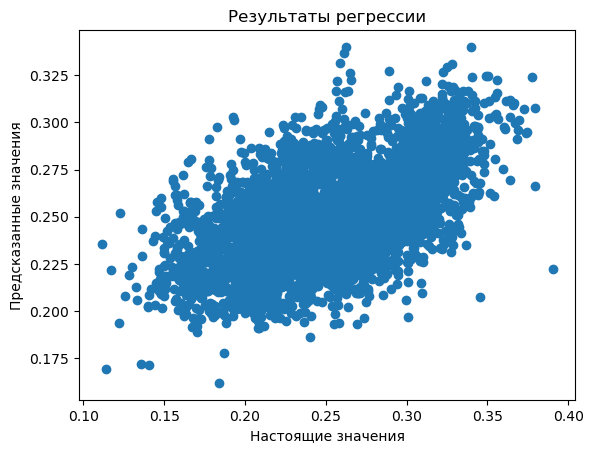

In [26]:
# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
y_pred = model.predict(X_test)

# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫ —Ç–æ—á–Ω–æ—Å—Ç–∏
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# –ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è –¥–ª—è –æ—Ü–µ–Ω–∫–∏ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏
cv_mse_scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(cv_mse_scores)
cv_mae_scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')
cv_r2_scores = cross_val_score(model, X, y, cv=10, scoring='r2')

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞ –∏ –º–µ—Ç—Ä–∏–∫–∏ —Ç–æ—á–Ω–æ—Å—Ç–∏
plt.scatter(y_test, y_pred)
plt.xlabel("–ù–∞—Å—Ç–æ—è—â–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è")
plt.ylabel("–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è")
plt.title("–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ä–µ–≥—Ä–µ—Å—Å–∏–∏")
plt.show()

In [27]:
# –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
print("–ú–µ—Ç—Ä–∏–∫–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

print("\n–ú–µ—Ç—Ä–∏–∫–∏ –ø—Ä–∏ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏:")
print(f"–°—Ä–µ–¥–Ω–µ–µ MSE: {np.mean(cv_mse_scores)}")
print(f"–°—Ä–µ–¥–Ω–µ–µ RMSE: {np.mean(cv_rmse_scores)}")
print(f"–°—Ä–µ–¥–Ω–µ–µ MAE: {np.mean(cv_mae_scores)}")
print(f"–°—Ä–µ–¥–Ω–µ–µ R2: {np.mean(cv_r2_scores)}")

# –í—ã–≤–æ–¥ –≤—Ä–µ–º–µ–Ω–∏ –æ–±—É—á–µ–Ω–∏—è
print(f"\n–í—Ä–µ–º—è, –∑–∞—Ç—Ä–∞—á–µ–Ω–Ω–æ–µ –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏: {training_time} —Å–µ–∫—É–Ω–¥")

–ú–µ—Ç—Ä–∏–∫–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:
MSE: 0.00149744716659614
RMSE: 0.03869686249033815
MAE: 0.03205137517951332
R2: 0.33769402526190406

–ú–µ—Ç—Ä–∏–∫–∏ –ø—Ä–∏ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏:
–°—Ä–µ–¥–Ω–µ–µ MSE: 0.0015071281011204498
–°—Ä–µ–¥–Ω–µ–µ RMSE: 0.03881652401351794
–°—Ä–µ–¥–Ω–µ–µ MAE: 0.032118454681200746
–°—Ä–µ–¥–Ω–µ–µ R2: 0.3242243919336515

–í—Ä–µ–º—è, –∑–∞—Ç—Ä–∞—á–µ–Ω–Ω–æ–µ –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏: 0.374112606048584 —Å–µ–∫—É–Ω–¥


XGBoost

In [28]:
# –û–ø—Ä–µ–¥–µ–ª–∏–º –º–æ–¥–µ–ª—å XGBoost
model = xgb.XGBRegressor()

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
start_time = time.time()

model.fit(X_train, y_train)

training_time = time.time() - start_time


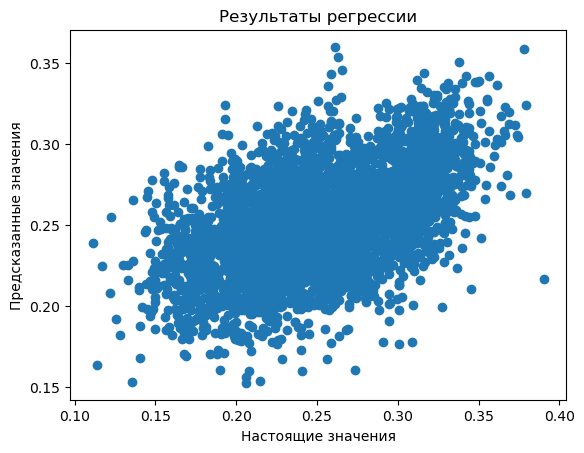

–ú–µ—Ç—Ä–∏–∫–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:
MSE: 0.0016729008894535895
RMSE: 0.040901111102922244
MAE: 0.03335944776241559
R2: 0.2600925902792761

–ú–µ—Ç—Ä–∏–∫–∏ –ø—Ä–∏ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏:
–°—Ä–µ–¥–Ω–µ–µ MSE: 0.0016759029266799313
–°—Ä–µ–¥–Ω–µ–µ RMSE: 0.04093479876058105
–°—Ä–µ–¥–Ω–µ–µ MAE: 0.033505745166171996
–°—Ä–µ–¥–Ω–µ–µ R2: 0.24847718014212133

–í—Ä–µ–º—è, –∑–∞—Ç—Ä–∞—á–µ–Ω–Ω–æ–µ –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏: 1.0352017879486084 —Å–µ–∫—É–Ω–¥


In [29]:
# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
y_pred = model.predict(X_test)

# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫ —Ç–æ—á–Ω–æ—Å—Ç–∏
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# –ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è –¥–ª—è –æ—Ü–µ–Ω–∫–∏ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏
cv_mse_scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(cv_mse_scores)
cv_mae_scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')
cv_r2_scores = cross_val_score(model, X, y, cv=10, scoring='r2')

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞ –∏ –º–µ—Ç—Ä–∏–∫–∏ —Ç–æ—á–Ω–æ—Å—Ç–∏
plt.scatter(y_test, y_pred)
plt.xlabel("–ù–∞—Å—Ç–æ—è—â–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è")
plt.ylabel("–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è")
plt.title("–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ä–µ–≥—Ä–µ—Å—Å–∏–∏")
plt.show()

# –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
print("–ú–µ—Ç—Ä–∏–∫–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")
print("\n–ú–µ—Ç—Ä–∏–∫–∏ –ø—Ä–∏ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏:")
print(f"–°—Ä–µ–¥–Ω–µ–µ MSE: {np.mean(cv_mse_scores)}")
print(f"–°—Ä–µ–¥–Ω–µ–µ RMSE: {np.mean(cv_rmse_scores)}")
print(f"–°—Ä–µ–¥–Ω–µ–µ MAE: {np.mean(cv_mae_scores)}")
print(f"–°—Ä–µ–¥–Ω–µ–µ R2: {np.mean(cv_r2_scores)}")

# –í—ã–≤–æ–¥ –≤—Ä–µ–º–µ–Ω–∏ –æ–±—É—á–µ–Ω–∏—è
print(f"\n–í—Ä–µ–º—è, –∑–∞—Ç—Ä–∞—á–µ–Ω–Ω–æ–µ –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏: {training_time} —Å–µ–∫—É–Ω–¥")


–í—ã–±–æ—Ä –º–æ–¥–µ–ª–∏

–ü—Ä–∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏–∏ –¥–≤—É—Ö –º–µ—Ç–æ–¥–æ–≤ –±—ã–ª–∏ –ø–æ–∫–∞–∑–∞–Ω—ã —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –∫–æ—Ç–æ—Ä—ã–µ –≥–æ–≤–æ—Ä—è—Ç –æ –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞—Ö –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è LightGBM. 

LightGBM –æ–∫–∞–∑–∞–ª—Å—è –ª—É—á—à–µ XGBoost –≤ –≤–∞—à–µ–º —Å–ª—É—á–∞–µ, –ø–æ—Ç–æ–º—É —á—Ç–æ –æ–Ω –±—ã—Å—Ç—Ä–µ–µ –æ–±—É—á–∞–µ—Ç—Å—è, –ª—É—á—à–µ —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è —Å –Ω–µ–ª–∏–Ω–µ–π–Ω—ã–º–∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—è–º–∏ –∏ –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏, –∞ —Ç–∞–∫–∂–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–µ–µ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç —Å–≤–æ–∏ –¥–µ—Ä–µ–≤—å—è (leaf-wise growth), —á—Ç–æ –ø–æ–∑–≤–æ–ª–∏–ª–æ –¥–æ—Å—Ç–∏—á—å –º–µ–Ω—å—à–∏—Ö –æ—à–∏–±–æ–∫ –∏ –ª—É—á—à–µ–≥–æ 
ùëÖ2.